In [22]:
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pathlib import Path
import os

#Open CSV file
dir = Path().resolve()
file = 'all_data_1.csv'
df = pd.read_csv(file)

In [23]:
#Creates a dataframe with cols: name, distance, moving_time, type, start_date, 
#average_speed, max_speed, has_heartrate, average_heartrate and max_heartrate
df1 = df.iloc[:,[1,2,3,6,12,36,37,38,39,40]]

#converts moving time from seconds to minutes (ish)
df1.iloc[:,2] = df1.iloc[:,2].div(60).round(2)

#change speed from meters per seconds to kph (3.6)
df1['average_speed'] = df1['average_speed'].mul(3.6)
df1['max_speed'] = df1['max_speed'].mul(3.6)

#Break date into start time and date
df1['start_date_local'] = pd.to_datetime(df1['start_date_local'])
df1['start_time'] = df1['start_date_local'].dt.time
df1['start_date_local'] = df1['start_date_local'].dt.date
df1_run = df1


C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying t

In [24]:
#Selects rows with type Run and then creates a new dataframe with that data
df1_run = df1['type']=='Run'
dfr = df1[df1_run]
dfr

,name,distance,moving_time,type,start_date_local,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,start_time
0,"🌧 Lunch Run - stress reliever, 5.10km on watch...",4984.2,24.23,Run,2021-01-14,12.3408,15.84,True,151.6,169.0,12:19:22
5,"⛅ Lunch Run - faster each km, but still steady",5042.0,24.12,Run,2021-01-12,12.5172,17.28,True,152.3,164.0,12:11:47
10,"⛅ Morning Run - z2 long and slow, had to stop ...",20135.0,108.75,Run,2021-01-10,11.1096,22.68,True,134.4,177.0,10:18:12
14,"🌫️ Lunch Run - weirdly, was far too warm z2",5056.4,24.23,Run,2021-01-07,12.5208,18.72,True,124.6,149.0,12:27:28
17,⛅ Lunch Run - easy lunch 5k,5106.5,24.87,Run,2021-01-05,12.3228,16.20,True,167.6,182.0,12:26:59
...,...,...,...,...,...,...,...,...,...,...,...
771,Afternoon Run,5241.6,27.23,Run,2014-01-15,11.5488,21.96,False,NaN,NaN,16:14:15
772,Afternoon Run,5204.2,21.50,Run,2014-01-08,14.5224,35.64,False,NaN,NaN,16:15:13
773,Afternoon Run,5213.6,23.25,Run,2014-01-07,13.4532,23.76,False,NaN,NaN,16:35:21
778,Failure,3866.5,16.93,Run,2013-06-04,13.7016,25.92,False,NaN,NaN,17:34:19


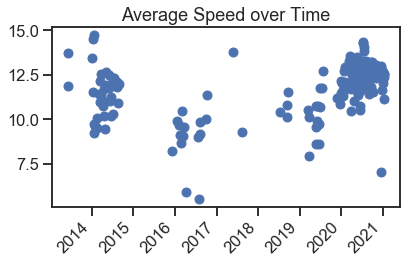

In [25]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.asarray(dfr.start_date_local)
y = np.asarray(dfr.average_speed)
ax1.plot_date(x, y)
ax1.set_title('Average Speed over Time')


#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()


Text(0.5, 1.0, 'Average Speed vs Distance')

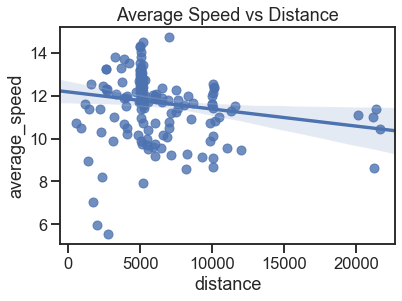

In [26]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'average_speed', data = dfr).set_title("Average Speed vs Distance")

In [27]:
#fiter dates to after 2018, by creating a new column as a boolean, and using a new variable, converting it to datetime to work against
fitdate= '2020-01-01' 
fitdate = datetime.strptime(fitdate, '%Y-%m-%d').date()
dfr['dateidea'] = np.where(dfr['start_date_local'] > fitdate, 'true', 'false')

C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
recr = dfr.loc[dfr['dateidea']=='true']
recr.head()

,name,distance,moving_time,type,start_date_local,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,start_time,dateidea
0,"🌧 Lunch Run - stress reliever, 5.10km on watch...",4984.2,24.23,Run,2021-01-14,12.3408,15.84,True,151.6,169.0,12:19:22,true
5,"⛅ Lunch Run - faster each km, but still steady",5042.0,24.12,Run,2021-01-12,12.5172,17.28,True,152.3,164.0,12:11:47,true
10,"⛅ Morning Run - z2 long and slow, had to stop ...",20135.0,108.75,Run,2021-01-10,11.1096,22.68,True,134.4,177.0,10:18:12,true
14,"🌫️ Lunch Run - weirdly, was far too warm z2",5056.4,24.23,Run,2021-01-07,12.5208,18.72,True,124.6,149.0,12:27:28,true
17,⛅ Lunch Run - easy lunch 5k,5106.5,24.87,Run,2021-01-05,12.3228,16.20,True,167.6,182.0,12:26:59,true


Text(0.5, 1.0, 'Average Speed vs Distance')

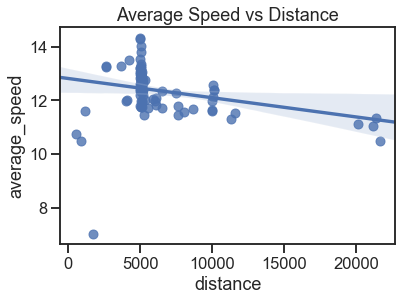

In [29]:
sns.set(style="ticks", context="talk")
sns.regplot(x='distance', y = 'average_speed', data = recr).set_title("Average Speed vs Distance")

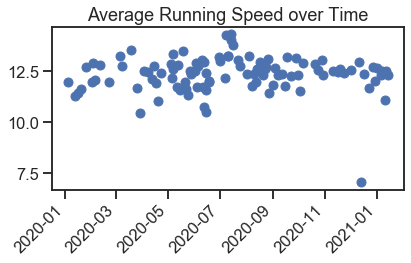

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
x = np.asarray(recr.start_date_local)
y = np.asarray(recr.average_speed)
ax1.plot_date(x, y)
ax1.set_title('Average Running Speed over Time')


#format the figure and display
fig.autofmt_xdate(rotation=45)
fig.tight_layout()

In [31]:
recr.head()

,name,distance,moving_time,type,start_date_local,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,start_time,dateidea
0,"🌧 Lunch Run - stress reliever, 5.10km on watch...",4984.2,24.23,Run,2021-01-14,12.3408,15.84,True,151.6,169.0,12:19:22,true
5,"⛅ Lunch Run - faster each km, but still steady",5042.0,24.12,Run,2021-01-12,12.5172,17.28,True,152.3,164.0,12:11:47,true
10,"⛅ Morning Run - z2 long and slow, had to stop ...",20135.0,108.75,Run,2021-01-10,11.1096,22.68,True,134.4,177.0,10:18:12,true
14,"🌫️ Lunch Run - weirdly, was far too warm z2",5056.4,24.23,Run,2021-01-07,12.5208,18.72,True,124.6,149.0,12:27:28,true
17,⛅ Lunch Run - easy lunch 5k,5106.5,24.87,Run,2021-01-05,12.3228,16.20,True,167.6,182.0,12:26:59,true


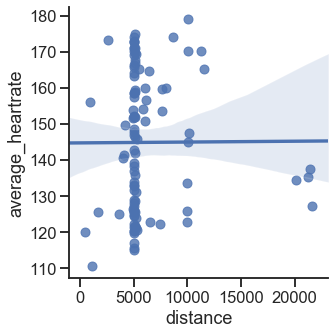

In [32]:
sns.lmplot(x='distance', y='average_heartrate', data=recr)

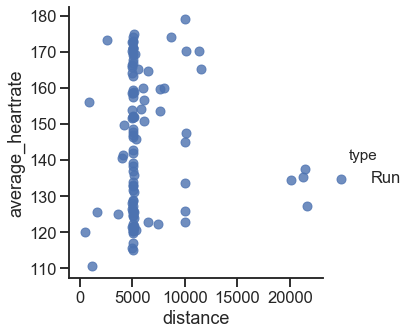

In [14]:
sns.lmplot(x='distance', y='average_heartrate', data=recr,
          fit_reg=False,
          hue='type')

In [15]:
recr_stats = recr.drop(['name','start_date_local', 'has_heartrate','start_time','dateidea'], axis=1)

In [33]:
recr_stats.head()

,distance,moving_time,type,average_speed,max_speed,average_heartrate,max_heartrate
0,4984.2,24.23,Run,3.428,4.4,151.6,169.0
5,5042.0,24.12,Run,3.477,4.8,152.3,164.0
10,20135.0,108.75,Run,3.086,6.3,134.4,177.0
14,5056.4,24.23,Run,3.478,5.2,124.6,149.0
17,5106.5,24.87,Run,3.423,4.5,167.6,182.0


In [35]:
melt_rcr = pd.melt(recr,
                  id_vars=["start_date_local", "distance","average_heartrate"],
                          var_name="value")

In [42]:
melted_df = pd.melt(df1,
                   id_vars=["name","type","average_heartrate", "max_heartrate"],
                   var_name="value")

In [41]:
melted_df.head()

,name,type,average_heartrate,value,value
0,"🌧 Lunch Run - stress reliever, 5.10km on watch...",Run,151.6,distance,distance
1,"🌧 Afternoon toddle - wet, but puddles",Hike,91.7,distance,distance
2,"Lunch Activity - weights, cables and abs",Workout,107.2,distance,distance
3,TDZ Stage 2: Standard Ride,VirtualRide,144.6,distance,distance
4,Watopia,VirtualRide,110.0,distance,distance


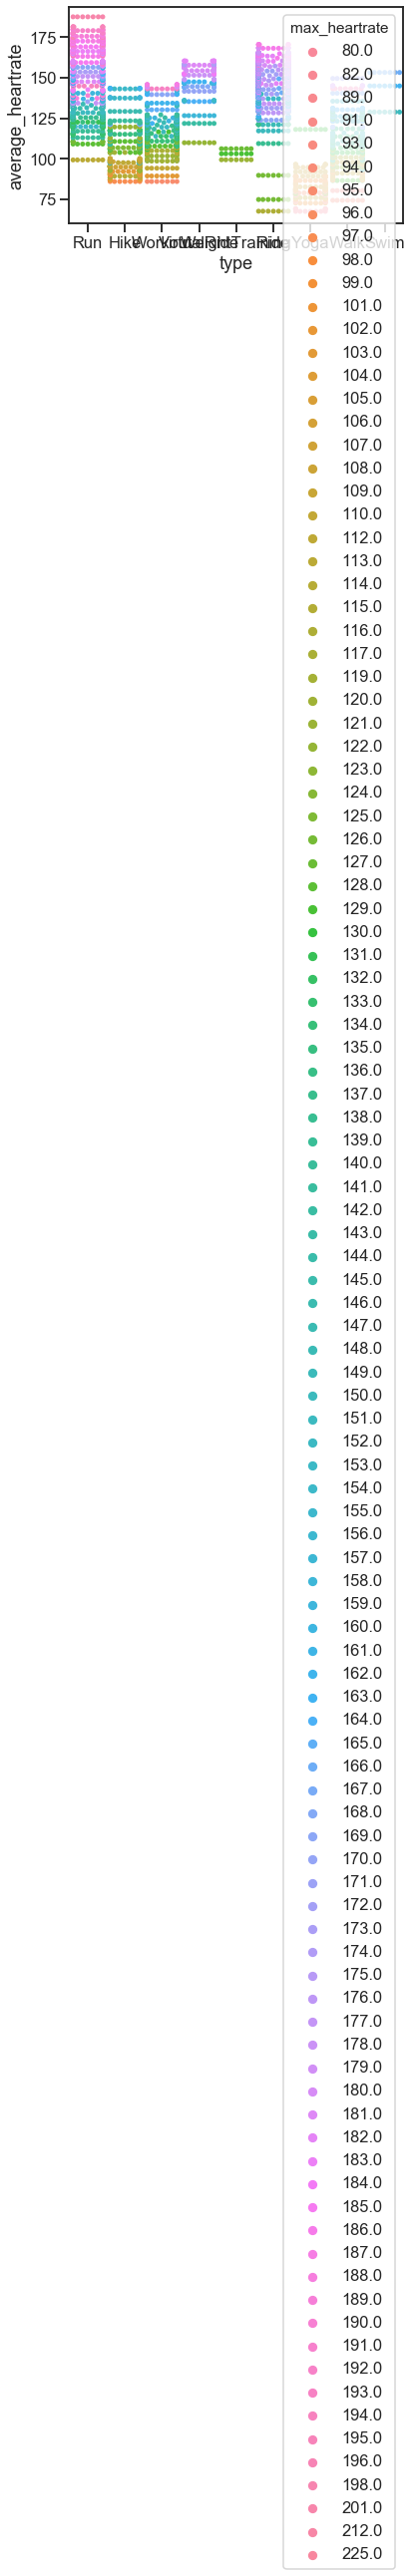

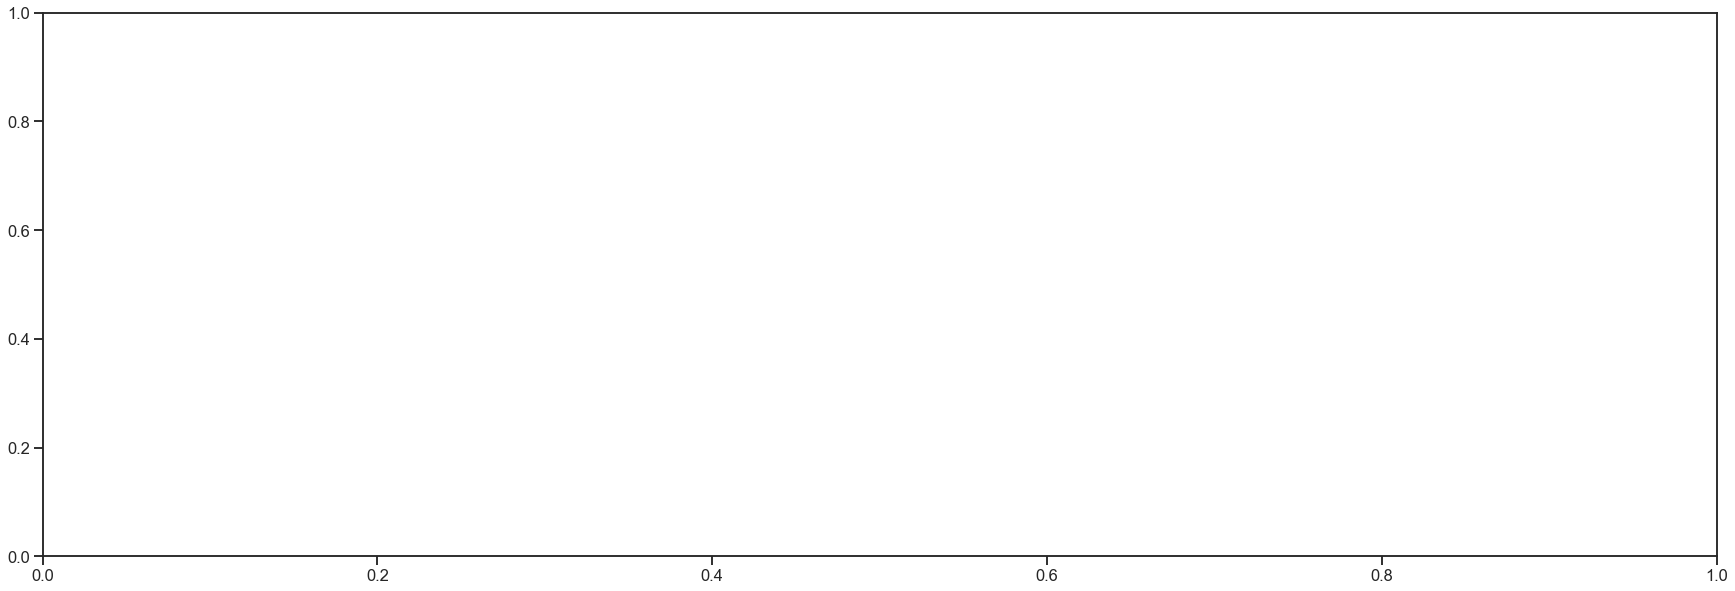

In [52]:
sns.swarmplot(x='type', y='average_heartrate', data=melted_df, hue='max_heartrate')
ax = plt.subplots(figsize=(30,10))



TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

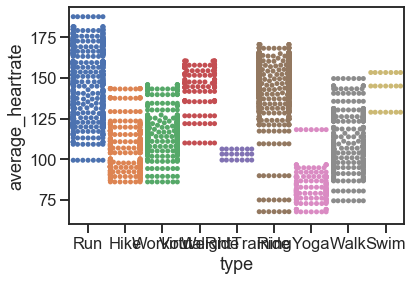

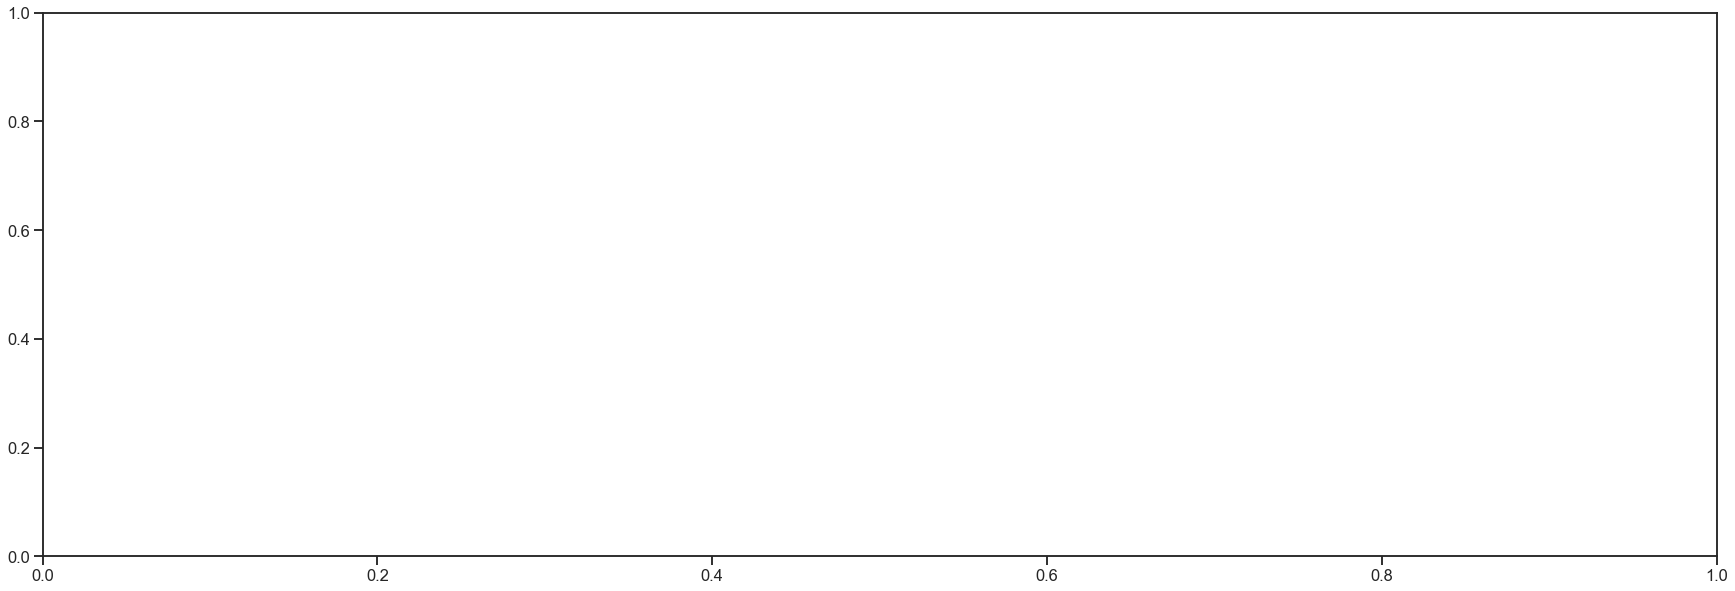

In [61]:
g = sns.swarmplot(x='type', y='average_heartrate', data=melted_df)
ax = plt.subplots(figsize=(30,10))
g.set_xticklabels(rotation=-45)

In [34]:
df1.head()

,name,distance,moving_time,type,start_date_local,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,start_time
0,"🌧 Lunch Run - stress reliever, 5.10km on watch...",4984.2,24.23,Run,2021-01-14,12.3408,15.84,True,151.6,169.0,12:19:22
1,"🌧 Afternoon toddle - wet, but puddles",1139.9,20.13,Hike,2021-01-13,3.3984,7.20,True,91.7,105.0,16:34:31
2,"Lunch Activity - weights, cables and abs",0.0,32.30,Workout,2021-01-13,0.0000,0.00,True,107.2,113.0,12:11:11
3,TDZ Stage 2: Standard Ride,24237.7,50.90,VirtualRide,2021-01-12,28.5696,91.08,True,144.6,168.0,18:02:46
4,Watopia,2802.1,5.43,VirtualRide,2021-01-12,30.9420,45.36,True,110.0,122.0,17:49:03


In [35]:
grptype = df1.groupby('type')

In [39]:
grptype.mean().round(2)

,distance,moving_time,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate
type,,,,,,,
Hike,1967.54,31.77,4.34,7.97,0.97,105.96,124.83
Ride,20505.30,53.69,24.26,40.19,0.85,148.40,173.43
Run,6004.48,31.66,11.70,20.31,0.66,146.26,166.52
Swim,1146.88,37.49,2.13,1.89,0.38,142.40,159.67
VirtualRide,14628.30,31.35,28.56,60.08,1.00,144.80,167.42
Walk,2296.33,30.85,4.57,9.60,0.96,110.14,137.48
WeightTraining,0.00,46.32,0.00,0.00,1.00,103.00,125.67
Workout,0.44,25.78,0.00,0.05,0.99,116.69,138.98
Yoga,0.00,25.73,0.00,0.00,0.93,83.29,102.81


In [41]:
#fiter dates to after 2018, by creating a new column as a boolean, and using a new variable, converting it to datetime to work against
fitdate= '2020-01-01' 
fitdate = datetime.strptime(fitdate, '%Y-%m-%d').date()
df1['dateidea'] = np.where(df1['start_date_local'] > fitdate, 'true', 'false')

C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
eyear = df1.loc[df1['dateidea']=='false']
eyear.head()

,name,distance,moving_time,type,start_date_local,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate,start_time,dateidea
492,☀️ Morning Run - the cold steals your speed,5025.6,24.85,Run,2020-01-01,12.1356,21.96,True,119.1,134.0,08:59:19,false
493,☁️ Afternoon Ride - signing off 2019 with a he...,16122.2,36.18,Ride,2019-12-31,26.7336,36.36,True,121.1,148.0,13:40:21,false
494,☁️ Morning Ride,16218.3,36.58,Ride,2019-12-31,26.6004,39.60,True,151.6,170.0,06:41:17,false
495,🌙 Afternoon Ride,15985.4,35.88,Ride,2019-12-30,26.7300,39.24,True,145.3,170.0,16:11:32,false
496,☁️ Morning Ride,16455.9,40.23,Ride,2019-12-30,24.5412,36.00,True,121.3,137.0,06:34:57,false


In [44]:
grptype1 = lyear.groupby('type')

In [48]:
grptype1.mean()

,distance,moving_time,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate
type,,,,,,,
Hike,1955.928814,32.259322,3.540325,7.987119,0.966102,105.763158,124.298246
Ride,24180.664286,60.270102,24.124261,38.729388,0.989796,152.340206,176.927835
Run,6085.600000,29.980374,12.378819,19.776449,0.962617,144.882524,165.660194
Swim,700.000000,12.435000,2.815200,3.780000,1.000000,136.950000,156.500000
VirtualRide,14628.300000,31.347368,28.556337,60.082105,1.000000,144.800000,167.421053
Walk,2128.825806,29.927258,4.382361,8.732903,0.983871,107.026230,135.016393
WeightTraining,0.000000,46.320000,0.000000,0.000000,1.000000,103.000000,125.666667
Workout,0.437168,25.784513,0.001274,0.047788,0.991150,116.685714,138.982143
Yoga,0.000000,25.734828,0.000000,0.000000,0.931034,83.285185,102.814815


In [49]:
grptype.mean()

,distance,moving_time,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate
type,,,,,,,
Hike,1967.540000,31.773000,4.341600,7.968000,0.966667,105.962069,124.827586
Ride,20505.299308,53.694983,24.263203,40.194187,0.854671,148.402429,173.433198
Run,6004.475410,31.660929,11.702675,20.313443,0.655738,146.262500,166.516667
Swim,1146.875000,37.490000,2.126700,1.890000,0.375000,142.400000,159.666667
VirtualRide,14628.300000,31.347368,28.556337,60.082105,1.000000,144.800000,167.421053
Walk,2296.327632,30.849737,4.570200,9.601579,0.960526,110.141096,137.479452
WeightTraining,0.000000,46.320000,0.000000,0.000000,1.000000,103.000000,125.666667
Workout,0.437168,25.784513,0.001274,0.047788,0.991150,116.685714,138.982143
Yoga,0.000000,25.734828,0.000000,0.000000,0.931034,83.285185,102.814815


In [51]:
grptype2 = eyear.groupby('type')

In [52]:
grptype2.mean()

,distance,moving_time,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate
type,,,,,,,
Hike,2652.600000,3.080000,51.616800,6.840000,1.000000,117.300000,155.000000
Ride,18619.509948,50.321361,24.334492,40.945759,0.785340,145.856000,171.173333
Run,5890.260526,34.026974,10.750737,21.069474,0.223684,154.623529,171.705882
Swim,1295.833333,45.841667,1.897200,1.260000,0.166667,153.300000,166.000000
Walk,3038.121429,34.935000,5.402057,13.448571,0.857143,125.975000,150.000000


In [102]:
grptype1.mean()

,distance,moving_time,average_speed,max_speed,has_heartrate,average_heartrate,max_heartrate
type,,,,,,,
Hike,1955.928814,32.259322,3.540325,7.987119,0.966102,105.763158,124.298246
Ride,24180.664286,60.270102,24.124261,38.729388,0.989796,152.340206,176.927835
Run,6085.600000,29.980374,12.378819,19.776449,0.962617,144.882524,165.660194
Swim,700.000000,12.435000,2.815200,3.780000,1.000000,136.950000,156.500000
VirtualRide,14628.300000,31.347368,28.556337,60.082105,1.000000,144.800000,167.421053
Walk,2128.825806,29.927258,4.382361,8.732903,0.983871,107.026230,135.016393
WeightTraining,0.000000,46.320000,0.000000,0.000000,1.000000,103.000000,125.666667
Workout,0.437168,25.784513,0.001274,0.047788,0.991150,116.685714,138.982143
Yoga,0.000000,25.734828,0.000000,0.000000,0.931034,83.285185,102.814815


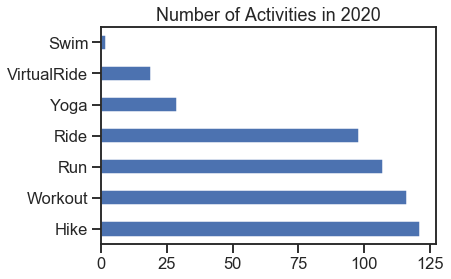

In [90]:
lyear['type'].value_counts().plot(kind='barh', title='Number of Activities in 2020')

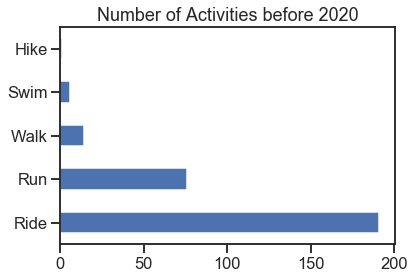

In [83]:
eyear['type'].value_counts().plot(kind='barh', title='Number of Activities before 2020')

In [84]:
#change walks to hikes
lyear.loc[(lyear.type == 'Walk'),'type']='Hike'

C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [89]:
#change weighttraining to workout
lyear.loc[(lyear.type == 'WeightTraining'),'type']='Workout'

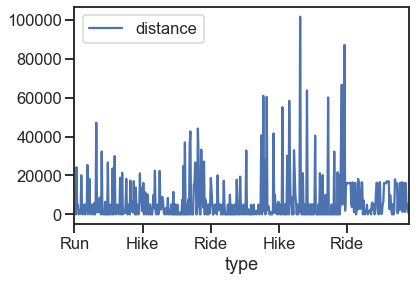

In [98]:

lyear.plot(x='type', y='distance');

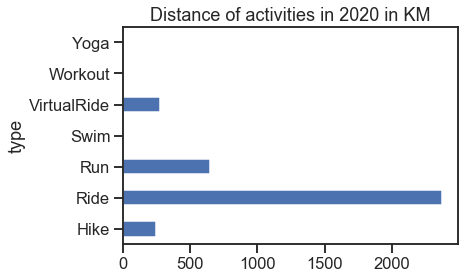

In [110]:
lyear.groupby(['type'])['distance'].sum().plot(kind='barh', title='Distance of activities in 2020 in KM')

In [107]:
lyear['distance'] = lyear['distance'].div(1000).round(2)


C:\Users\Liam_Statham\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
